In [16]:
from keras import layers, models
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 3s 1us/step


In [3]:
def newswire_to_text():
    word_index = reuters.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
    return decoded_newswire

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: 
- cast the label list as an integer tensor
- one-hot encoding.
One-hot encoding is a widely used formatfor categorical data, also called categorical encoding. In this case, one-hot encoding of the labels consists of embedding each label as an all-zero vector with a 1 in the place of the label index. 

In [9]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, you’re trying to classify short snippets of text. But there is a new constraint here: the number of output classes has gone from 2 to 46.

In a stack of Dense layers like that you’ve been using, each layer can only access information
present in the output of the previous layer. If one layer drops some information
relevant to the classification problem, this information can never be recovered by later
layers. In the previous example, you used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited. For this reason you’ll use larger layers. Let’s go with 64 units

There are two other things you should note about this architecture:
- You end the network with a Dense layer of size 46. This means for each input sample, the network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
- The last layer uses a softmax activation. You saw this pattern in the MNIST example. It means the network will output a probability distribution over the 46 different output classes—for every input sample, the network will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i. The 46 scores will sum to 1.

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the network and the true distribution of the labels. By minimizing the distance between these two distributions, you train the network to output something
as close as possible to the true labels.

In [12]:
model.compile(optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

## Validation

In [13]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [14]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 142us/step - loss: 2.5323 - acc: 0.4947 - val_loss: 1.7251 - val_acc: 0.6100
Epoch 2/20
7982/7982 [==============================] - 1s 121us/step - loss: 1.4506 - acc: 0.6857 - val_loss: 1.3487 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 113us/step - loss: 1.0982 - acc: 0.7638 - val_loss: 1.1722 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.8722 - acc: 0.8153 - val_loss: 1.0853 - val_acc: 0.7560
Epoch 5/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.7056 - acc: 0.8477 - val_loss: 0.9861 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.5688 - acc: 0.8781 - val_loss: 0.9407 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.4615 - acc: 0.9040 - val_loss: 0.9097 - val_acc: 0.8030
Epoc

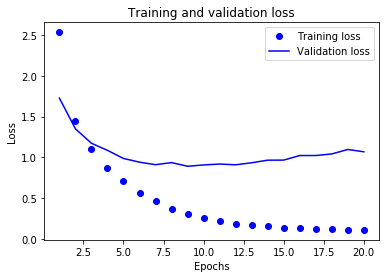

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

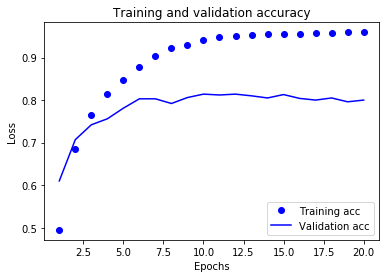

In [19]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 117us/step - loss: 2.5397 - acc: 0.5226 - val_loss: 1.6731 - val_acc: 0.6560
Epoch 2/9
7982/7982 [==============================] - 1s 87us/step - loss: 1.3710 - acc: 0.7120 - val_loss: 1.2751 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 92us/step - loss: 1.0133 - acc: 0.7790 - val_loss: 1.1298 - val_acc: 0.7520
Epoch 4/9
7982/7982 [==============================] - 1s 91us/step - loss: 0.7973 - acc: 0.8257 - val_loss: 1.0535 - val_acc: 0.7580
Epoch 5/9
7982/7982 [==============================] - 1s 98us/step - loss: 0.6391 - acc: 0.8633 - val_loss: 0.9753 - val_acc: 0.7930
Epoch 6/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.5113 - acc: 0.8925 - val_loss: 0.9094 - val_acc: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 94us/step - loss: 0.4107 - acc: 0.9152 - val_loss: 0.8931 - val_acc: 0.8200
Epoch 8/9
79

[1.0241800144328035, 0.7747105966692829]